## Usage of one explainer

Take EFM and Exp_EFM as an example, and use dataset amazon_toy.

In [1]:
from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import StratifiedSplit
from cornac.data.sentiment import SentimentModality
from cornac.models import EFM
from cornac.explainer import Exp_EFM

# Load the Amazon toy dataset
rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=20))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=20))
md = SentimentModality(data=sentiment_data)

eval_method = StratifiedSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

# Instantiate the EFM model
efm = EFM(max_iter=20)
efm.fit(eval_method.train_set)

# Instantiate the explainer
explainer = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)


/Users/athina/Desktop/ROSE/clean_venv_1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 974
Number of items = 7861
Number of ratings = 26231
Max rating = 5.0
Min rating = 1.0
Global mean = 4.3
---
Test data:
Number of users = 974
Number of items = 7861
Number of ratings = 4840
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 974
Total items = 7861


### Explain recommendations

In [2]:
# first, we need some recommendations
some_users = eval_method.test_set.user_ids[:3]
recomendations = efm.recommend_to_multiple_users(some_users, k=5)
print(recomendations)

           user_id     item_id  prediction
0   A2TXMYYGSZCSZ1  B0000524NG    4.788801
1   A2TXMYYGSZCSZ1  B001L123JS    4.685280
2   A2TXMYYGSZCSZ1  B006XG3NRC    4.619111
3   A2TXMYYGSZCSZ1  B008FREULU    4.275772
4   A2TXMYYGSZCSZ1  B005VPREAS    4.243783
5    A2C27IQUH9N1Z  B001L123JS    4.437986
6    A2C27IQUH9N1Z  B0000524NG    4.383355
7    A2C27IQUH9N1Z  B006XG3NRC    4.148132
8    A2C27IQUH9N1Z  B000WCOJZ8    3.979965
9    A2C27IQUH9N1Z  B00004U3FX    3.926259
10   ABSFFH7ECSE49  B0000524NG    4.346515
11   ABSFFH7ECSE49  B001L123JS    4.340716
12   ABSFFH7ECSE49  B006XG3NRC    4.152691
13   ABSFFH7ECSE49  B008FREULU    3.868022
14   ABSFFH7ECSE49  B000ANIVRG    3.866382


In [3]:
# now, we can explain the recommendations
explainer.explain_recommendations(recomendations)

Computing explanations: 100%|██████████| 15/15 [00:00<00:00, 196.04it/s]


,user_id,item_id,prediction,explanations
0,A2TXMYYGSZCSZ1,B0000524NG,4.788801,"{'toy': 5.584977, 'also': 5.2246675, 'doll': 5..."
1,A2TXMYYGSZCSZ1,B001L123JS,4.685280,"{'toy': 5.7940626, 'also': 5.266629, 'doll': 5..."
2,A2TXMYYGSZCSZ1,B006XG3NRC,4.619111,"{'toy': 5.904228, 'also': 5.605051, 'doll': 5...."
3,A2TXMYYGSZCSZ1,B008FREULU,4.275772,"{'toy': 5.272653, 'also': 5.37397, 'doll': 5.7..."
4,A2TXMYYGSZCSZ1,B005VPREAS,4.243783,"{'toy': 5.0203915, 'also': 5.124734, 'doll': 5..."
5,A2C27IQUH9N1Z,B001L123JS,4.437986,"{'toy': 5.7940626, 'really': 5.391638, 'pieces..."
6,A2C27IQUH9N1Z,B0000524NG,4.383355,"{'toy': 5.584977, 'really': 5.585854, 'pieces'..."
7,A2C27IQUH9N1Z,B006XG3NRC,4.148132,"{'toy': 5.904228, 'really': 6.2706375, 'pieces..."
8,A2C27IQUH9N1Z,B000WCOJZ8,3.979965,"{'toy': 5.889739, 'really': 5.238186, 'pieces'..."
9,A2C27IQUH9N1Z,B00004U3FX,3.926259,"{'toy': 5.5595264, 'really': 5.089987, 'pieces..."


### Explain one user-item pair

In [5]:
# we can explain one recommendation using the 4 most important features
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
explanation = explainer.explain_one_recommendation_to_user(one_user, one_item, feature_k=4)
print(f"For User {one_user} and Item {one_item}:")
print("Explanation:")
print(explanation)

For User A2TXMYYGSZCSZ1 and Item B00004TZY8:
Explanation:
{'toy': 4.501335, 'also': 3.9797702, 'doll': 4.2085037, 'quality': 4.264781}


### Explain one user-item with ref-item

In [6]:
# we can also explain a recommendation using a reference item
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
ref_item = eval_method.train_set.item_ids[10]
explanation = explainer.explain_one_with_ref(user_id=one_user, item_id=one_item, ref_item_id=ref_item)
explanation

,user_id,item_id,explanation,ref_item_id,ref_explanation
0,A2TXMYYGSZCSZ1,B00004TZY8,"{'toy': 4.501335, 'also': 3.9797702, 'doll': 4...",B004OS8J98,"{'toy': 4.440774, 'also': 4.1871843, 'doll': 4..."


In [7]:
# explanation for user-item
print(explanation['explanation'])
# and explanation for user-ref_item
print(explanation['ref_explanation'])

0    {'toy': 4.501335, 'also': 3.9797702, 'doll': 4...
Name: explanation, dtype: object
0    {'toy': 4.440774, 'also': 4.1871843, 'doll': 4...
Name: ref_explanation, dtype: object


### Generate plot for Exp_EFM

In [8]:
# add also add some visualisations
users = eval_method.test_set.user_ids
recommendations = efm.recommend_to_multiple_users(users, k=10)
explanations = explainer.explain_recommendations(recommendations, feature_k=8)
explanations_df = explanations.copy()

Computing explanations: 100%|██████████| 9740/9740 [00:01<00:00, 5708.36it/s]


/Users/athina/Desktop/ROSE/clean_venv_1/lib/python3.9/site-packages/cornac-2.0.0-py3.9-macosx-11.0-arm64.egg/cornac/visualization/visualization.py:297: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(x_count, rotation=45)
/Users/athina/Desktop/ROSE/clean_venv_1/lib/python3.9/site-packages/cornac-2.0.0-py3.9-macosx-11.0-arm64.egg/cornac/visualization/visualization.py:299: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(x_coeff, rotation=45)


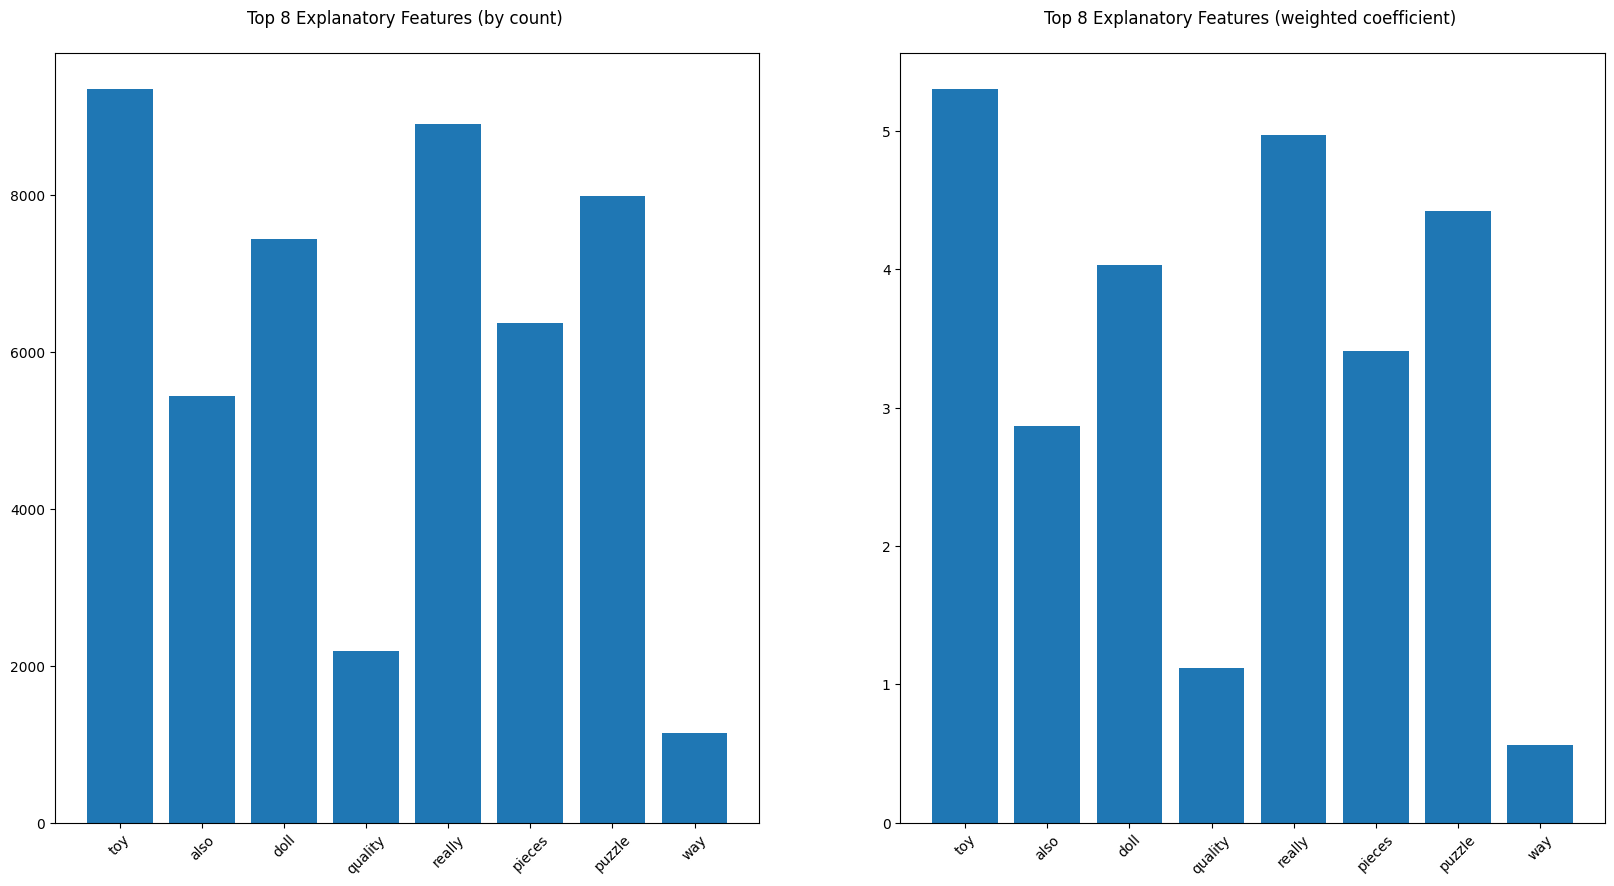

In [9]:
from cornac.visualization import Visualization
my_plots = Visualization()

# Create a plot for a specific user and item
one_user = eval_method.train_set.user_ids[15]
one_item = eval_method.train_set.item_ids[0]
ind_df = my_plots.create_individual_feature_importance_plot(
    explanations,
    user_id=one_user,
    item_id=one_item,
    type="bar",
    top_k=6,
    save_plot=False,
)

filtered_df = my_plots.create_aggregate_feature_importance_plot(
    explanations, type="bar", top_k=8, save_plot=False
)

## Experiment

In [11]:
from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import RatioSplit
from cornac.data.sentiment import SentimentModality

from cornac.models import EFM
from cornac.explainer import Exp_EFM
from cornac.experiment import Experiment_Explainers

from cornac.metrics_explainer import (Metric_Exp_DIV as DIV, Metric_Exp_EnDCG as EnDCG)

rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=50))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=50))
rating = rating[:500]

md = SentimentModality(data=sentiment_data)

eval_method = RatioSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

efm = EFM(max_iter=20)
efm_exp = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)

# initialize the models and metrics
rec_exp_pairs = [(efm, efm_exp)]
exp_metrics = [DIV(), EnDCG()]

# initialize experiment
experiment = Experiment_Explainers(
    eval_method=eval_method,
    models=rec_exp_pairs,
    metrics=exp_metrics,
    distribution=False,
    eval_train=True,
)
experiment.run()

INFO:cornac.experiment.experiment_explainers:Start training Recommender EFM...
INFO:cornac.experiment.experiment_explainers:*****Start evaluating model-explainer: 'EFM:Exp_EFM'...
INFO:cornac.experiment.experiment_explainers:Step 1/3: Recommender EFM creates recommendations
INFO:cornac.experiment.experiment_explainers:Step 2/3: Explainer Exp_EFM create explanation for all recommendations


rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 88
Number of items = 253
Number of ratings = 400
Max rating = 5.0
Min rating = 1.0
Global mean = 4.4
---
Test data:
Number of users = 88
Number of items = 253
Number of ratings = 57
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 88
Total items = 253


Computing explanations: 100%|██████████| 880/880 [00:00<00:00, 8261.73it/s]
INFO:cornac.experiment.experiment_explainers:Step 3/3: Metric Metric_Exp_DIV starts evaluation...
INFO:cornac.experiment.experiment_explainers:Result: Feature diversity: 0.44865032578290365
ERROR:cornac.experiment.experiment_explainers:Metric Metric_Exp_EnDCG does not support Exp_EFM.
INFO:cornac.experiment.experiment_explainers:experiment data: [[0.44865032578290365, 'N/A', 0.013952970504760742, 0.44301581382751465]]
INFO:cornac.experiment.experiment_explainers:Experiment result: 
 recommender:explainer |      Metric_Exp_DIV | Metric_Exp_EnDCG |             Train(s) |         Evaluate(s)
EFM:Exp_EFM           | 0.44865032578290365 |              N/A | 0.013952970504760742 | 0.44301581382751465

